<div class="alert alert-block alert-success">

Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [103]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


from prepare import prep_titanic, prep_telco, split_data
from acquire import new_titanic_data, new_telco_data

In [104]:
# Acquire data
titanic = prep_titanic(new_titanic_data())

In [105]:
# Train, validate, split data
train, validate, test = split_data(titanic, 'survived')

In [106]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 818 to 406
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     310 non-null    int64  
 1   pclass       310 non-null    int64  
 2   sex          310 non-null    object 
 3   sibsp        310 non-null    int64  
 4   parch        310 non-null    int64  
 5   fare         310 non-null    float64
 6   embark_town  310 non-null    object 
 7   alone        310 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.8+ KB


In [121]:
train.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
818,0,3,male,0,0,6.45,Southampton,1
98,1,2,female,0,1,23.00,Southampton,0
825,0,3,male,0,0,6.95,Queenstown,1
573,1,3,female,0,0,7.75,Queenstown,1
322,1,2,female,0,0,12.35,Queenstown,1


In [108]:
titanic_train = pd.get_dummies(train)


In [109]:
titanic_val= pd.get_dummies(validate)

<div class="alert alert-block alert-success">

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [110]:
# Counts for target value: survived
train.survived.value_counts()

0    191
1    119
Name: survived, dtype: int64

In [111]:
# we know what our X and y are, let's be explicit about defining them
X_train = titanic_train.drop(columns='survived')
y_train = titanic_train.survived

X_val = titanic_val.drop(columns='survived')
y_val = titanic_val.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [123]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
818,3,0,0,6.45,1,0,1,0,0,1
98,2,0,1,23.00,0,1,0,0,0,1
825,3,0,0,6.95,1,0,1,0,1,0
573,3,0,0,7.75,1,1,0,0,1,0
322,2,0,0,12.35,1,1,0,0,1,0


In [112]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

print(f"Baseline accuracy: {matches_baseline_prediction.mean()}")

Baseline accuracy: 0.6161290322580645


<div class="alert alert-block alert-success">

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

#### since dummies was made, no mapping necessary

In [ ]:
X_train.dropna()

In [ ]:
y_train

In [124]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=42)


In [125]:
# Fit the model 
tree1 = tree1.fit(X_train, y_train)



In [126]:
# Use the model
# Evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

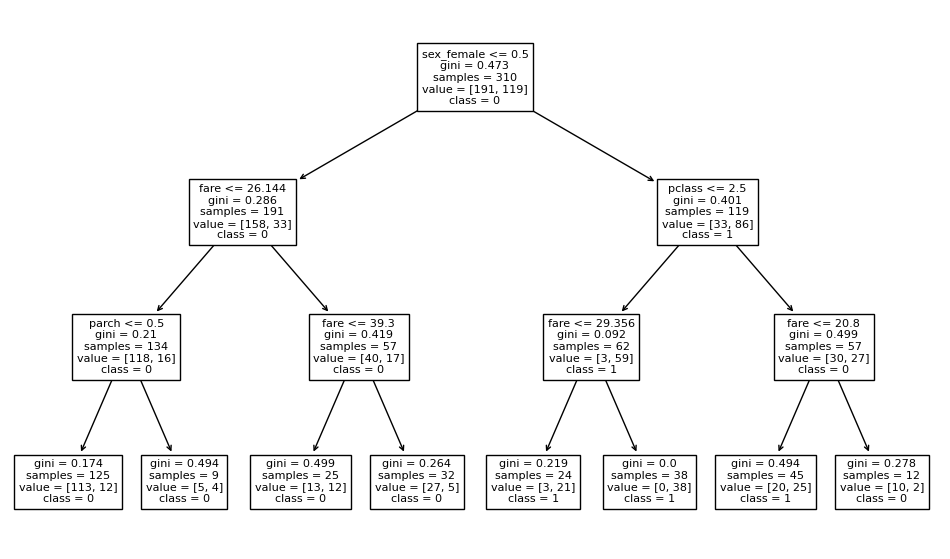

In [127]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns.tolist(), class_names=['0','1'])
plt.show()

<div class="alert alert-block alert-success">

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [128]:
# we have our model clf, let's get those metrics from our informational output
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [129]:
# Confusion matrix
conf = confusion_matrix(y_train, y_predictions)
conf

array([[168,  23],
       [ 35,  84]])

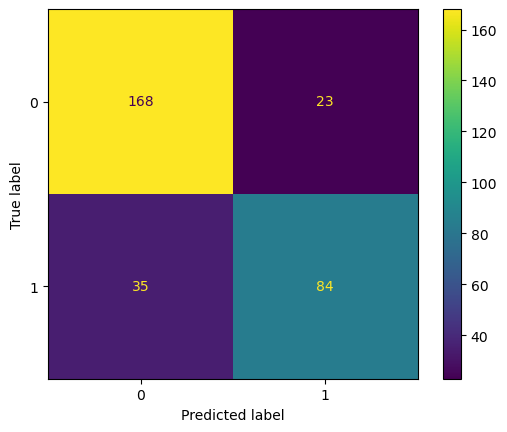

In [130]:
ConfusionMatrixDisplay.from_predictions(y_train, y_predictions)

In [131]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       191
           1       0.79      0.71      0.74       119

    accuracy                           0.81       310
   macro avg       0.81      0.79      0.80       310
weighted avg       0.81      0.81      0.81       310



<div class="alert alert-block alert-success">

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [132]:
labels = sorted(y_train.unique())
labels

pd.DataFrame(conf, index=[str(label) + ' actual'for label in labels], columns=[str(label) + ' predict'for label in labels])

,0 predict,1 predict
0 actual,168,23
1 actual,35,84


In [133]:
conf.ravel()

array([168,  23,  35,  84])

In [134]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(168, 23, 35, 84)

In [135]:
all = (TP + TN + FP + FN)

accuracy = (TP + TN) / all

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN


In [136]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8129032258064516

True Positive Rate/Sensitivity/Recall/Power: 0.7058823529411765
False Positive Rate/False Alarm Ratio/Fall-out: 0.12041884816753927
True Negative Rate/Specificity/Selectivity: 0.8795811518324608
False Negative Rate/Miss Rate: 0.29411764705882354

Precision/PPV: 0.7850467289719626
F1 Score: 0.7433628318584071

Support (0): 119
Support (1): 191


<div class="alert alert-block alert-success">

5. Run through steps 2-4 using a different max_depth value.

In [137]:
# max depth = 1
tree2 = DecisionTreeClassifier(max_depth=1, random_state= 42)
tree2.fit(X_train, y_train)
tree2.score(X_train, y_train)

0.7870967741935484

In [138]:
# from previous tree1 max depth = 3
tree1.fit(X_train, y_train)
tree1.score(X_train, y_train)

0.8129032258064516

<div class="alert alert-block alert-success">

6. Which model performs better on your in-sample data?

* Model with max depth = 3

<div class="alert alert-block alert-success">

7. Which model performs best on your out-of-sample data, the validate set?

* very close, but model with depth = 3

In [143]:
# max depth = 1 
tree = DecisionTreeClassifier(max_depth=1, random_state= 42)
out_tree = tree.fit(X_train, y_train)
out_tree.score(X_val, y_val)

0.7611940298507462

In [144]:
# max depth = 3
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
out_tree = tree.fit(X_train, y_train)
out_tree.score(X_val, y_val)

0.7611940298507462

<div class="alert alert-block alert-success">

1. Work through these same exercises using the Telco dataset.

2. Experiment with this model on other datasets with a higher number of output classes.

In [145]:
# Acquire data
telco = prep_telco(new_telco_data())

In [146]:
# Train, validate, split data
train, validate, test = split_data(telco, 'churn')

In [147]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4196,5924-IFQTT,Male,0,Yes,Yes,13,Yes,Yes,No,Yes,...,Yes,Yes,No,Yes,72.8,930.05,No,Month-to-month,DSL,Electronic check
6112,8652-YHIYU,Female,0,No,Yes,16,Yes,Yes,No,No,...,Yes,No,No,Yes,79.5,1264.2,No,One year,Fiber optic,Credit card (automatic)
1347,2003-CKLOR,Male,0,No,No,66,Yes,No,No,Yes,...,No,Yes,Yes,No,99.5,6710.5,Yes,Month-to-month,Fiber optic,Electronic check
42,0071-NDAFP,Male,0,Yes,Yes,25,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.5,630.6,No,Two year,None,Credit card (automatic)
6533,9277-JOOMO,Female,0,No,No,3,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,24.6,86.35,No,Month-to-month,None,Mailed check


In [148]:
train = train.drop(columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type'])

train['total_charges'] = train['total_charges'].str.strip()
train = train[train.total_charges != '']
train['total_charges'] = train.total_charges.astype(float)

train['churn'] = train.churn.map({'Yes': 1, 'No': 0})
train['churn'] = train.churn.astype(int)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 4196 to 3925
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           2460 non-null   int64  
 1   monthly_charges  2460 non-null   float64
 2   total_charges    2460 non-null   float64
 3   churn            2460 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 96.1 KB


In [149]:
train.head()

,tenure,monthly_charges,total_charges,churn
4196,13,72.8,930.05,0
6112,16,79.5,1264.20,0
1347,66,99.5,6710.50,1
42,25,25.5,630.60,0
6533,3,24.6,86.35,0


In [150]:
X_train = train.drop(columns='churn')
y_train = train.churn

X_val = validate.drop(columns='churn')
y_val = validate.churn

X_test = test.drop(columns='churn')
y_test = test.churn

In [151]:
train.churn.value_counts()

0    1806
1     654
Name: churn, dtype: int64

In [152]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.41%


In [153]:
# Make the model
churn_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [154]:
#fit the model
churn_tree1 = churn_tree.fit(X_train, y_train)

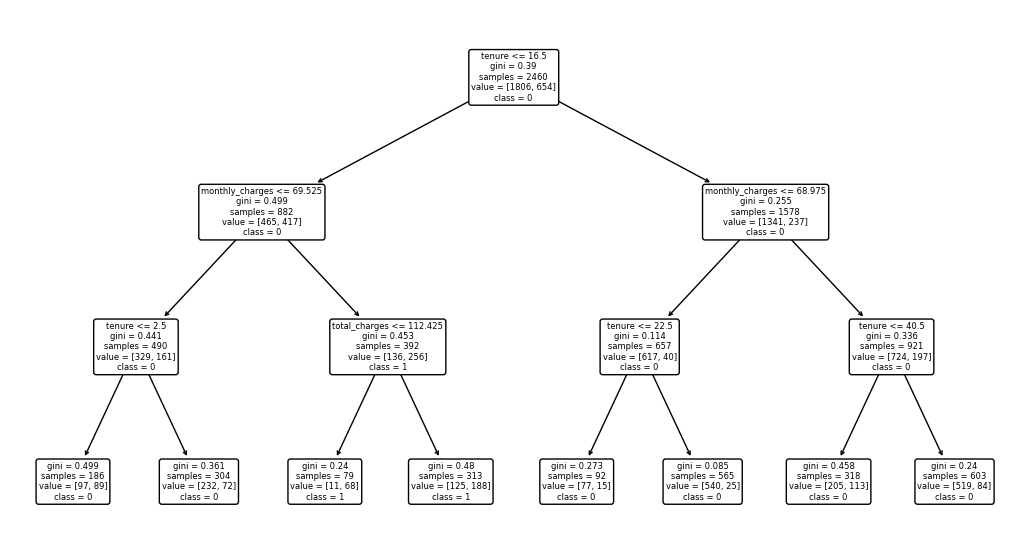

In [155]:
#visualize
plt.figure(figsize=(13, 7))
plot_tree(churn_tree, feature_names=X_train.columns.tolist(), 
class_names = np.array(churn_tree.classes_).astype('str').tolist(), rounded=True)
plt.show()

In [156]:
accuracy = churn_tree.score(X_train, y_train)
print(f'Model 1 accuracy: {accuracy:.2%}')

Model 1 accuracy: 78.29%
